In [1]:
import pickle as pkl
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.markers
import os 
os.chdir(os.path.dirname(os.getcwd()))
import pandas as pd
import pickle as pkl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
#style.use('ggplot')
import seaborn as sns
sns.set('talk')
sns.set_style("ticks")
sns.set_color_codes()
%matplotlib inline
import matplotlib.pylab as pylab



# DDPG

In [2]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_noise_True_rewards_dqn.pkl', "rb"))

In [3]:
rewards[-1]

-245514.28179981548

Text(0.5, 0, 'Episode')

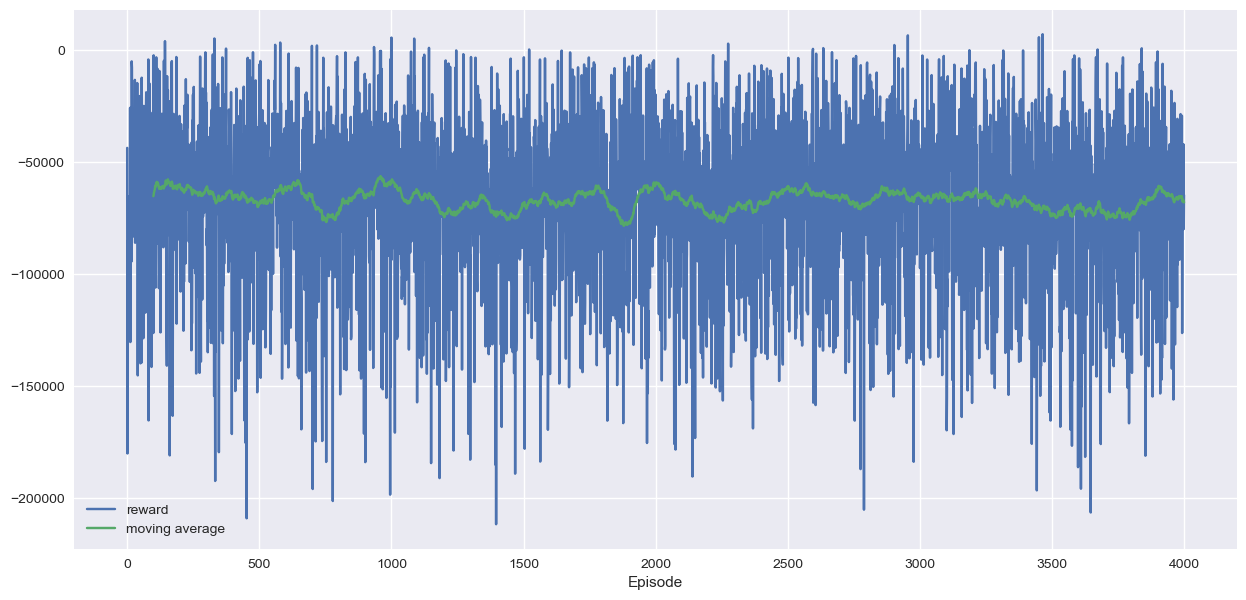

In [25]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]
r = rewards_df.fillna(rewards_df.mean())
moving_avg = r.rolling(window=10).mean()
moving_avg = moving_avg.rename(columns={'reward':'moving average'})
f, ax = plt.subplots(figsize=(15,7))
r.plot(ax=ax)
moving_avg.plot(ax=ax)
plt.xlabel('Episode')
#plt.savefig('data/output/rewards_dynamic_dqn.png')

In [5]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [6]:
eval_data['Date'] = pd.date_range(start='2014-01-01',end='2014-02-01', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [7]:
rewards = pkl.load(open('data/output/DDPG/DDPG_dynamic_True_rewards_dqn.pkl', "rb"))

In [8]:
rewards_df = pd.DataFrame()
rewards_df['reward'] = rewards[:-1]

In [9]:
r = rewards_df.fillna(rewards_df.mean())

In [10]:
moving_avg = r.rolling(window=10).mean()

In [11]:
moving_avg = moving_avg.rename(columns={'reward':'moving average'})

## Evaluation

In [12]:
eval_data = pkl.load(open('data/output/DDPG/DDPG_eval.pkl', 'rb'))

In [13]:
eval_data

,PV Generation,Datetime,Gas Consumption,Prices,Prices Natural gas,Moles,Electrolyzer,Battery Action,Actions,Rewards,Storage,Power,Sun Power,Hydrogen,Wind Power,Natural Gas
0,0.0,2019-05-01 02:00:00,0,55.00,2.59,1.000000e+01,0,0,"[0, 0]",0.000000,0,0.000000,0.0,0.00000,0.000000,0.000000
1,0.0,2019-05-01 03:00:00,0,55.00,2.59,6.111139e+04,-1.0,1.0,"[1.0, -1.0]",-3794.396515,10,4.000000,0.0,61.10139,140.250348,39751.853547
2,0.0,2019-05-01 04:00:00,0,55.00,2.59,0.000000e+00,-1.0,1.8568262e-05,"[1.8568262e-05, -1.0]",-10267.116002,10,0.000245,0.0,0.00000,126.079034,112264.225140
3,0.0,2019-05-01 05:00:00,0,53.00,2.59,0.000000e+00,-1.0,1.8289322e-05,"[1.8289322e-05, -1.0]",-10314.663958,10,0.000255,0.0,0.00000,110.792402,112784.131493
4,0.0,2019-05-01 06:00:00,0,53.00,2.59,0.000000e+00,-1.0,4.3816737e-05,"[4.3816737e-05, -1.0]",-10124.271993,10,0.000792,2697000.0,0.00000,84.027727,110702.005263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,2019-05-07 22:00:00,0,45.00,2.54,1.396645e+07,-0.99937457,1.0688046e-05,"[1.0688046e-05, -0.99937457]",-0.021785,10,-0.000323,0.0,0.00000,536.507067,0.000000
165,0.0,2019-05-07 23:00:00,0,44.18,2.54,1.387106e+07,-0.99894035,2.4200475e-05,"[2.4200475e-05, -0.99894035]",-0.002810,10,0.000064,0.0,0.00000,420.410592,0.000000
166,0.0,2019-05-08 00:00:00,0,39.03,2.64,1.377579e+07,-0.99961984,1.3680924e-05,"[1.3680924e-05, -0.99961984]",-0.001398,10,-0.000024,0.0,0.00000,297.505794,0.000000
167,0.0,2019-05-08 01:00:00,0,35.96,2.64,1.367961e+07,-0.99992603,2.2489656e-05,"[2.2489656e-05, -0.99992603]",-0.007383,10,0.000205,0.0,0.00000,244.472291,0.000000


In [14]:
#eval_data['Sun Power'] = eval_data_sun['Sun Power']/3

In [15]:
eval_data['Date'] = pd.date_range(start='2019-05-01',end='2020-04-30', periods=len(eval_data))
eval_data.index = eval_data['Date']

In [16]:


costs_ddpg = sum(eval_data['Prices']*eval_data['Power'])
costs_gas = sum(eval_data['Natural Gas'])

produced_hydrogen = sum(eval_data['Hydrogen'])
sum_cost = costs_gas + costs_ddpg

d = {
    'col1': [1],
    'Earnings from grid': "$ {:0,.2f}".format(costs_ddpg), 
    'Cost Gas': "$ {:0,.2f}".format(costs_gas),
    'Hydrogen Produced': "{:0,.2f} kg/H2".format(produced_hydrogen),
    'Sum': "$ {:0,.2f}".format(sum_cost)
}
df = pd.DataFrame(data=d)
df

,col1,Earnings from grid,Cost Gas,Hydrogen Produced,Sum
0,1,"$ -106,830.58","$ 375,502.22","29,209.14 kg/H2","$ 268,671.64"


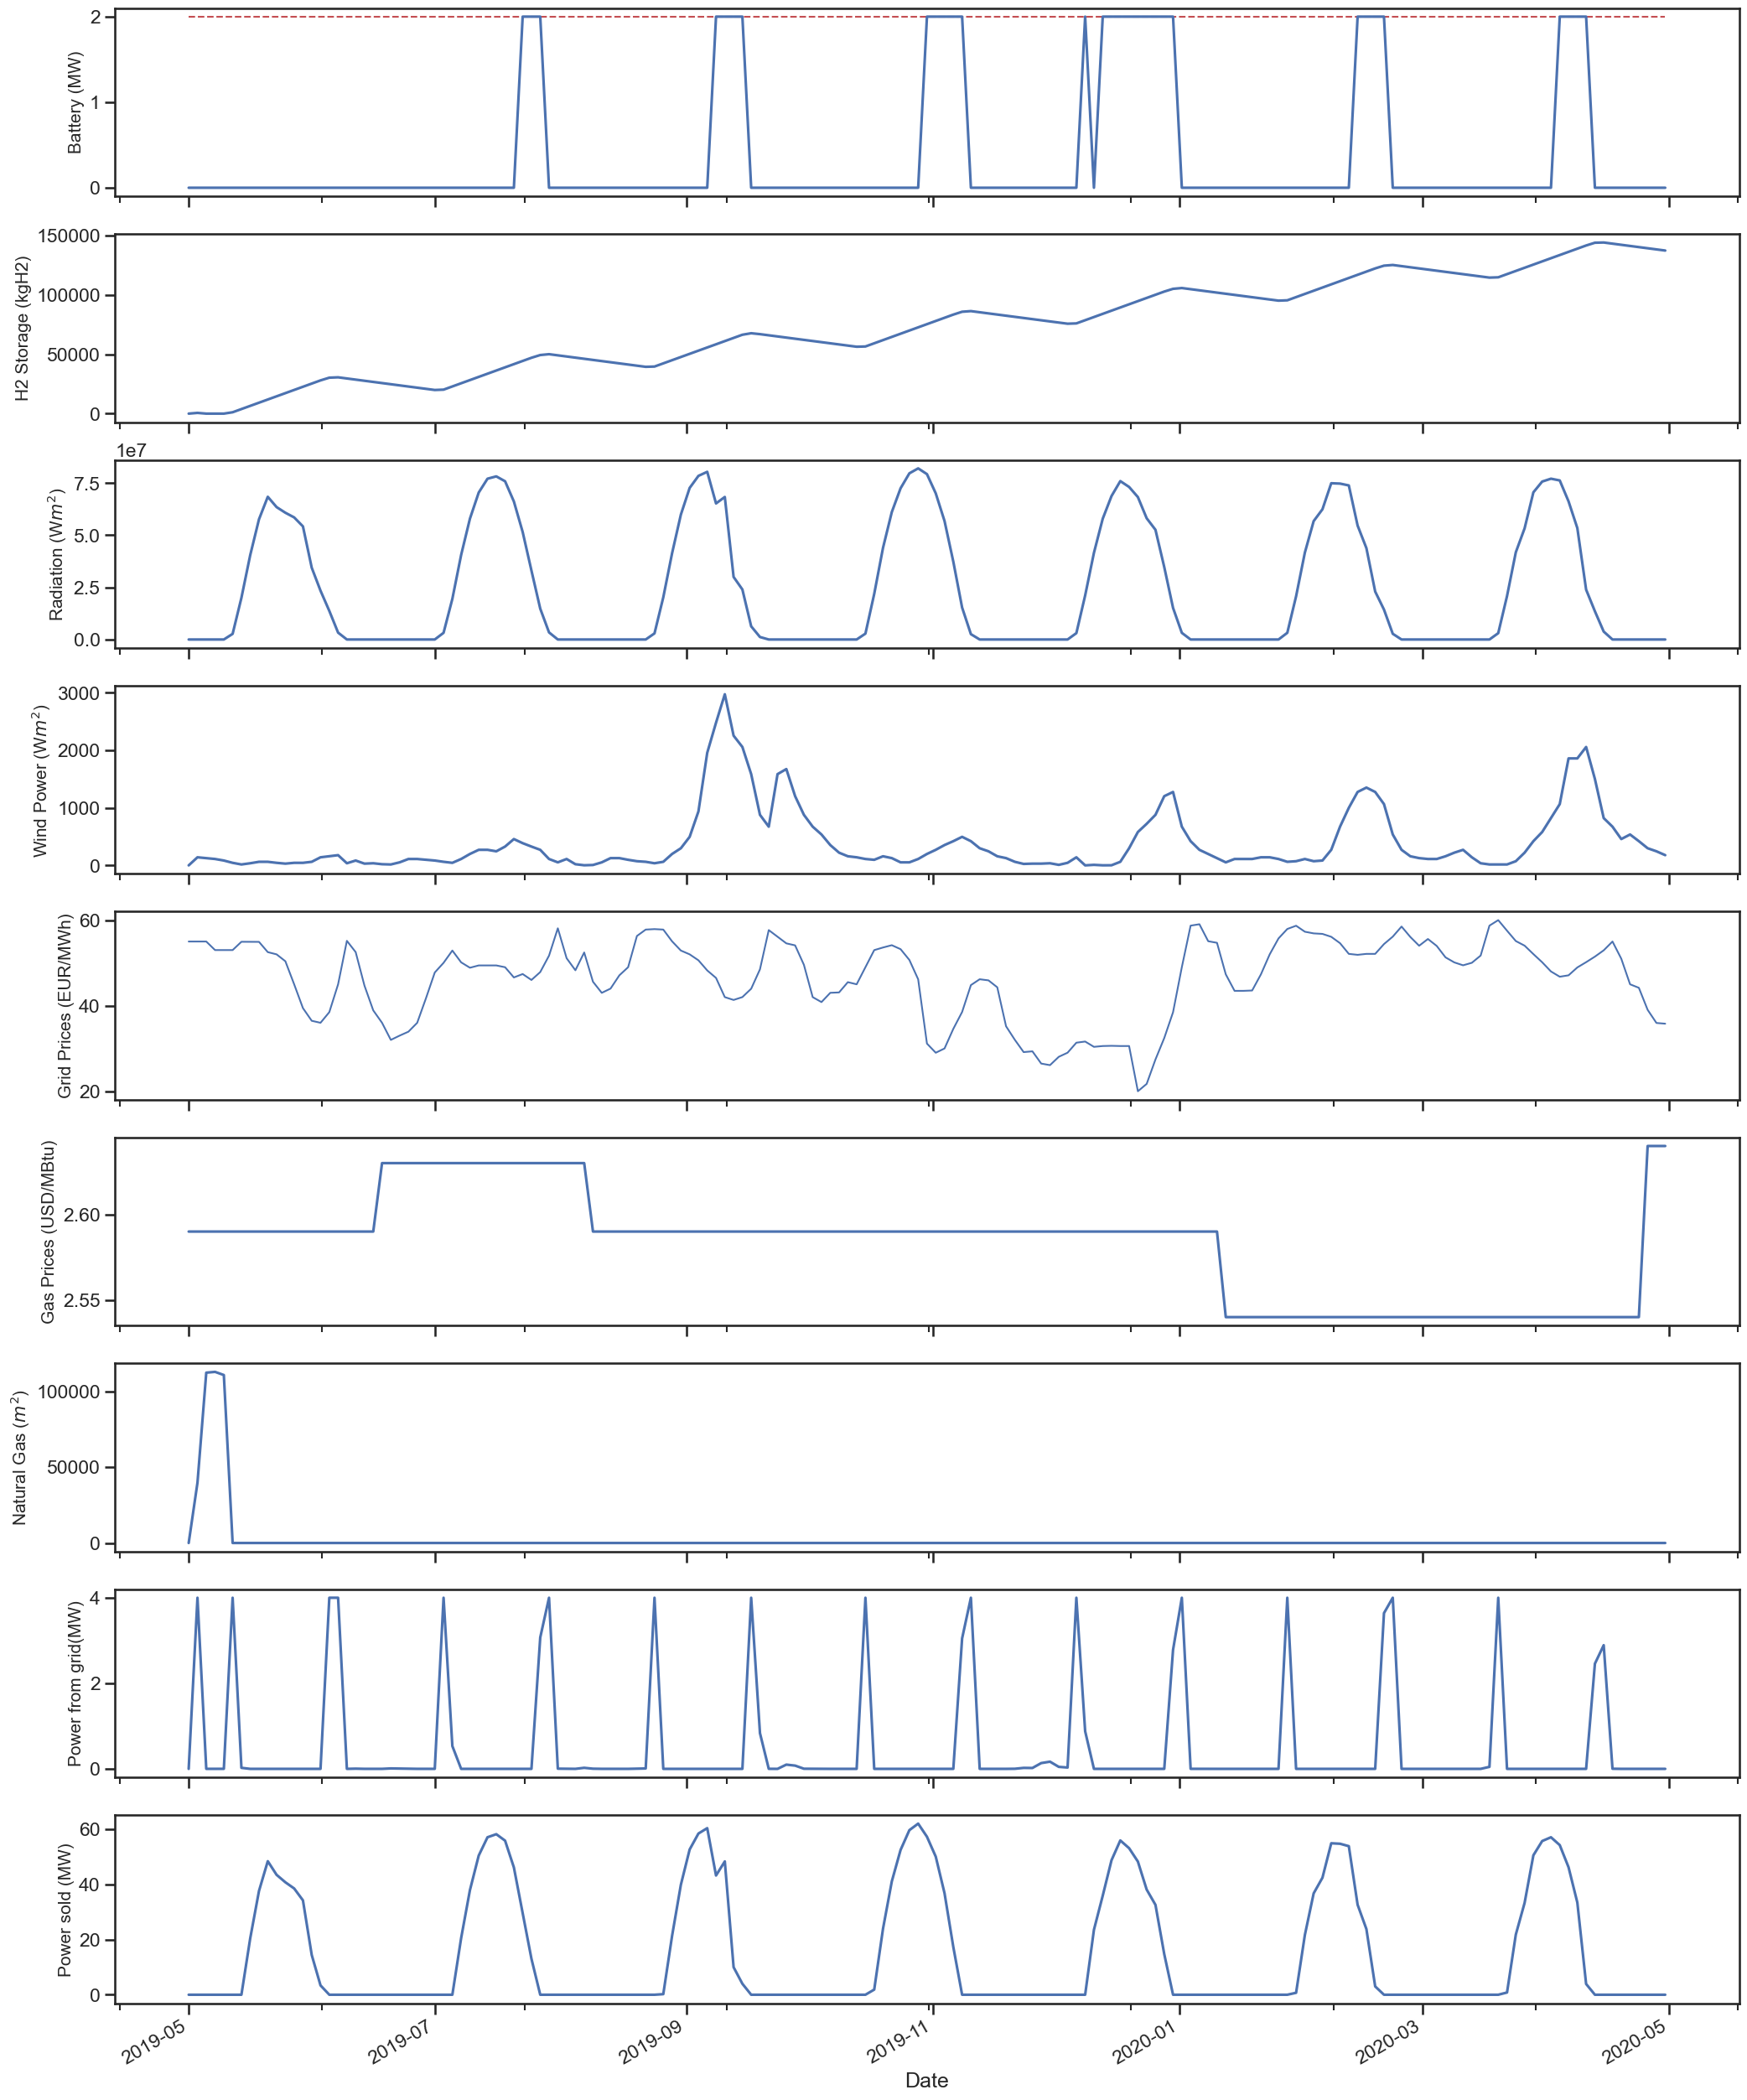

In [17]:
f, axs = plt.subplots(9,figsize=(25,35), sharex=True) #nrows=1, ncols=2,
one_week = eval_data.iloc[:]

one_week['Max Storage Capacity'] = 2000000*1e-6
one_week['Max Storage Capacity'].plot(ax=axs[0],c='r', linestyle = 'dashed', linewidth=1.5)
one_week['Storage_mw'] = one_week['Storage']*1e-6
one_week['Storage_mw'].plot(ax=axs[0], legend=False)
axs[0].set_ylabel('Battery (MW)', fontsize='small')
#axs[0].set_title('Battery')

one_week['Moles'] = one_week['Moles']*0.0101
one_week['Moles'].plot(ax=axs[1], legend=False)
axs[1].set_ylabel('H2 Storage (kgH2)', fontsize='small')
#axs[1].set_title('H2 Storage')

one_week['PV Generation'].plot(ax=axs[2], legend=False)
axs[2].set_ylabel('Radiation (W$m^2$) ', fontsize='small')

one_week['Wind Power'].plot(ax=axs[3], legend=False)
axs[3].set_ylabel('Wind Power (W$m^2$) ', fontsize='small')
#axs[2].set_title('Sun Power')

one_week['Prices'].plot(ax=axs[4], linewidth=1.5)
axs[4].set_ylabel('Grid Prices (EUR/MWh)', fontsize='small')

one_week['Prices Natural gas'].plot(ax=axs[5], legend=False)
#axs[5].set_title('Natural Gas')
axs[5].set_ylabel('Gas Prices (USD/MBtu)', fontsize='small')

one_week['Natural Gas'].plot(ax=axs[6], legend=False)
#axs[5].set_title('Natural Gas')
axs[6].set_ylabel('Natural Gas ($m^2$)', fontsize='small')

one_week['Power sold(W)'] = eval_data['Power']
one_week['Power sold(W)'] = np.maximum(0, one_week['Power sold(W)'])
one_week['Power sold(W)'].plot(ax=axs[7], legend=False)
#axs[6].set_title('Power from grid')
axs[7].set_ylabel('Power from grid(MW)', fontsize='small')

one_week['Power sold (MW)'] = eval_data['Power']
one_week['Power sold (MW)'] = abs(np.minimum(0, one_week['Power sold (MW)']))
one_week['Power sold (MW)'].plot(ax=axs[8], legend=False)
#axs[7].set_title('Power sold (MW)')
axs[8].set_ylabel('Power sold (MW)', fontsize='small')



plt.subplots_adjust(hspace=0.2)
plt.savefig('data/output/DDPG/images/simulation_result.jpg',  dpi=400, bbox_inches='tight')


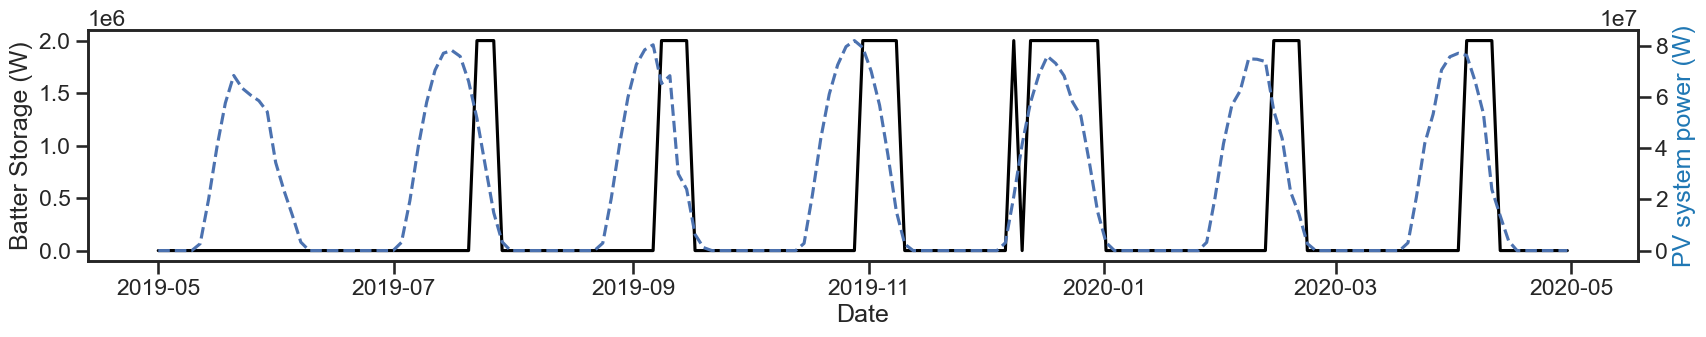

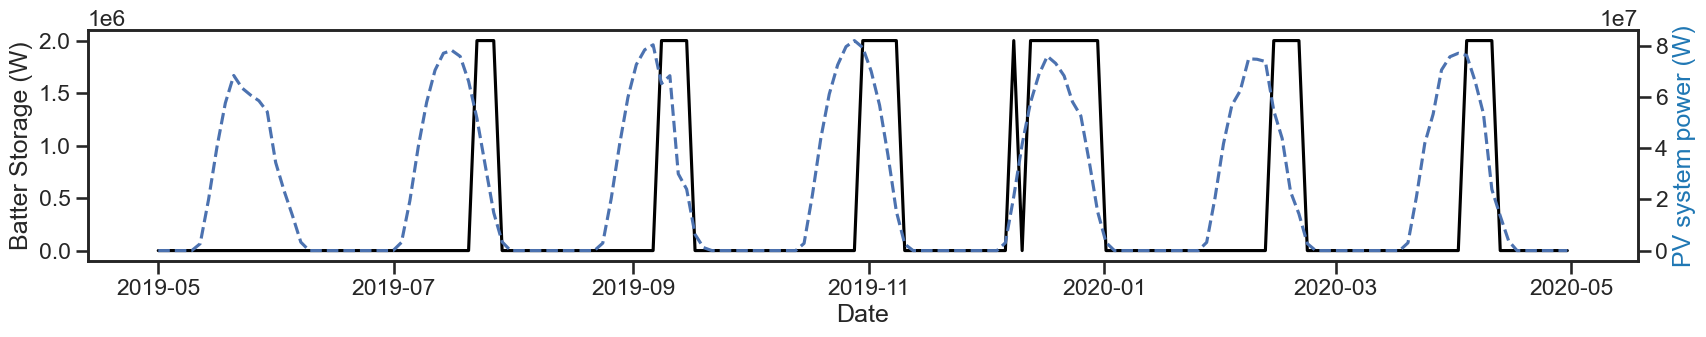

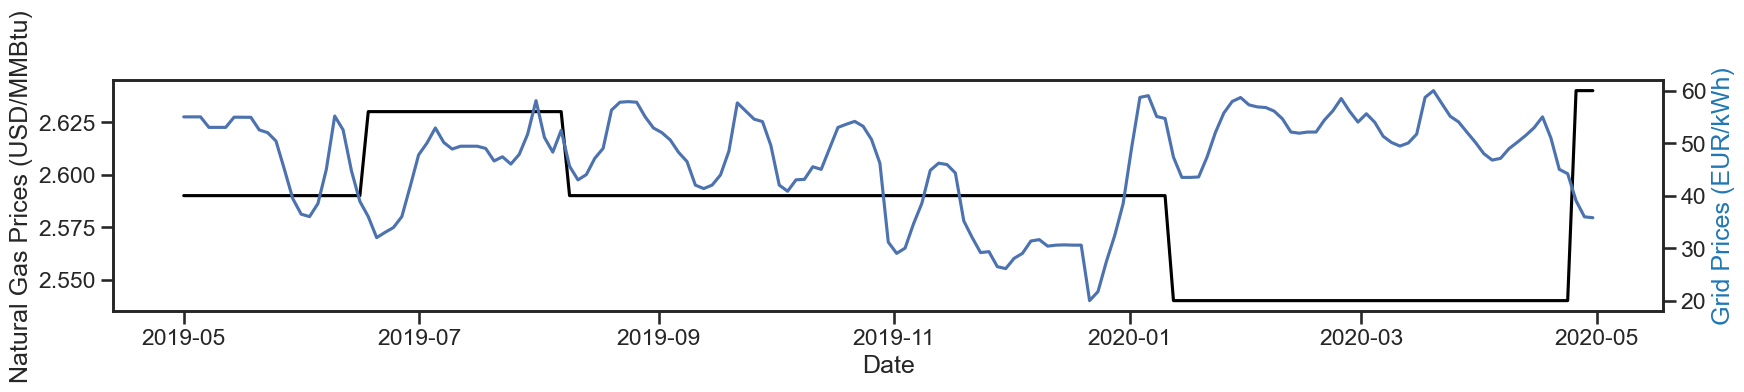

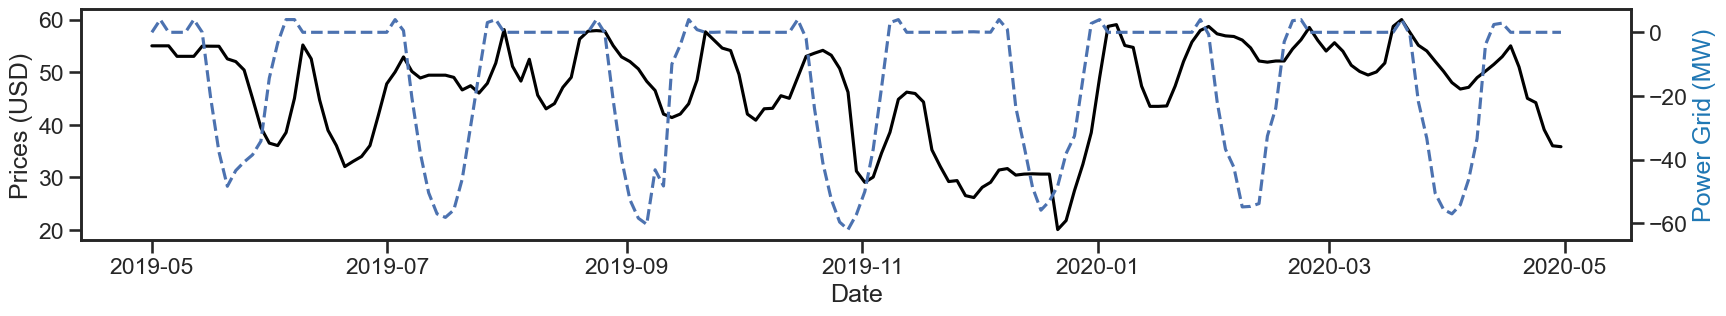

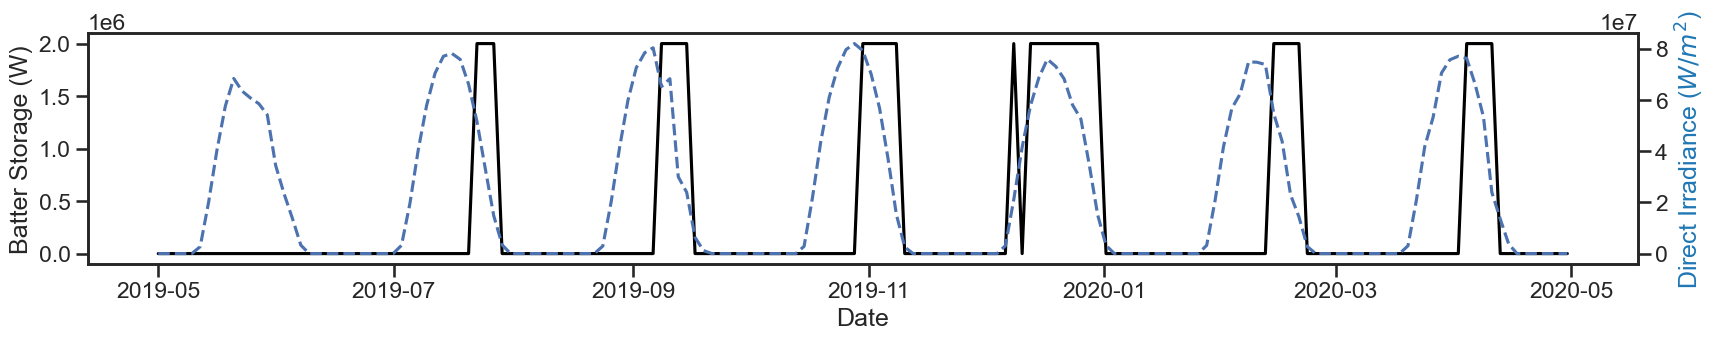

In [18]:
'''

plot_data = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data2 = eval_data.iloc[0+2190:7*24+2190]
plot_data3 = eval_data.iloc[0+2190*3:7*24+2190*3]
plot_data4 = eval_data.iloc[0+2190*3-42*24:7*24+2190*3-42*24]
'''
plot_data = eval_data.iloc[0:186]
plot_data2 = eval_data.iloc[0:186]
plot_data3 = eval_data.iloc[0:186]
plot_data4 = eval_data.iloc[0:186]

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_aug21.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data2['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data2['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("PV system power (W)", color='tab:blue')
plt.savefig('data/output/DDPG/images/Battery_Radiation_feb21.jpg',  dpi=400, bbox_inches='tight')

plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(eval_data['Prices Natural gas'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Natural Gas Prices (USD/MMBtu)")

ax3=ax.twinx()
ax3.plot(eval_data['Prices'], label = 'Power from Grid')
ax3.set_ylabel("Grid Prices (EUR/kWh)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid.jpg',  dpi=400, bbox_inches='tight')
plt.show()


fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Prices'], color='0', label = 'Grid Prices')
ax.set_xlabel("Date")
ax.set_ylabel("Prices (USD)")

ax2=ax.twinx()
ax2.plot(plot_data4['Power'], linestyle='dashed', label = 'Power from Grid')
ax2.set_ylabel("Power Grid (MW)", color='tab:blue')
plt.savefig('data/output/DDPG/images/prices_grid_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()

fig,ax = plt.subplots(figsize=(20,3), sharex=True, nrows=1, ncols=1)
#plt.rcParams["font.family"] = "Times New Roman"
#plt.style.use('grayscale')
ax.grid(False)

ax.plot(plot_data4['Storage'], color='0', label = 'Battery Storage')
ax.set_xlabel("Date")
ax.set_ylabel("Batter Storage (W)")

ax2=ax.twinx()
ax2.plot(plot_data4['PV Generation'], linestyle='dashed', label = 'PV Generation')
ax2.set_ylabel("Direct Irradiance ($W/m^2$)", color='tab:blue')

plt.savefig('data/output/DDPG/images/Battery_Radiation_highlighted.jpg',  dpi=400, bbox_inches='tight')
plt.show()



### Electrolyzer

## Policy Evaluation

In [19]:
policy_data = pkl.load(open('data/output/DDPG/DDPG_policy_eval.pkl', 'rb'))

In [20]:
policy_data

,Temperature,Actions,Grid Prices,Battery Level,Battery Action,Electrolyzer Action,Sun Power,Natural Gas Price
0,-10,"[1.0, -1.0]",-10,0.0,-1.000000,-1.000000,0,0
1,-10,"[1.0, -0.9999998]",-10,0.0,-1.000000,-1.000000,0,1
2,-10,"[1.0, -0.6241464]",-10,0.0,-0.624146,-0.624146,0,2
3,-10,"[1.0, 1.0]",-10,0.0,1.000000,1.000000,0,3
4,-10,"[1.0, 1.0]",-10,0.0,1.000000,1.000000,0,4
...,...,...,...,...,...,...,...,...
10799995,19,"[0.89344704, -0.89220244]",49,4500000.0,-0.892202,-0.892202,590,5
10799996,19,"[0.83443743, 0.60523176]",49,4500000.0,0.605232,0.605232,590,6
10799997,19,"[0.6697615, 0.9995018]",49,4500000.0,0.999502,0.999502,590,7
10799998,19,"[0.43696174, 0.9999997]",49,4500000.0,1.000000,1.000000,590,8


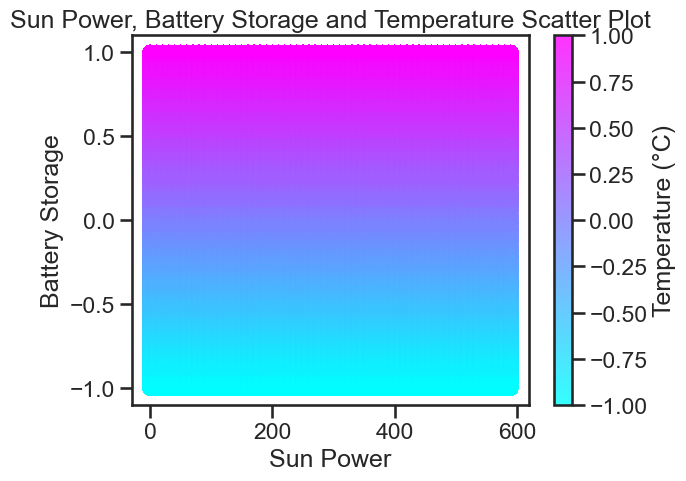

In [21]:

# Generate some random data
sun_power = policy_data['Sun Power']
battery_storage = policy_data['Battery Action']
temperature = policy_data['Electrolyzer Action']

# Create the scatter plot
plt.scatter(sun_power, battery_storage, c=temperature, cmap='cool', alpha=0.8)
plt.colorbar(label='Temperature (°C)')

# Add axis labels and a title
plt.xlabel('Sun Power')
plt.ylabel('Battery Storage')
plt.title('Sun Power, Battery Storage and Temperature Scatter Plot')

# Show the plot
plt.show()

"    \nselected_temperatures = [19, 20, 21]\n\nfor i in range(3):\n    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]\n    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)\n    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))\n\nselected_storage = [1000, 2000, 4000]\n"

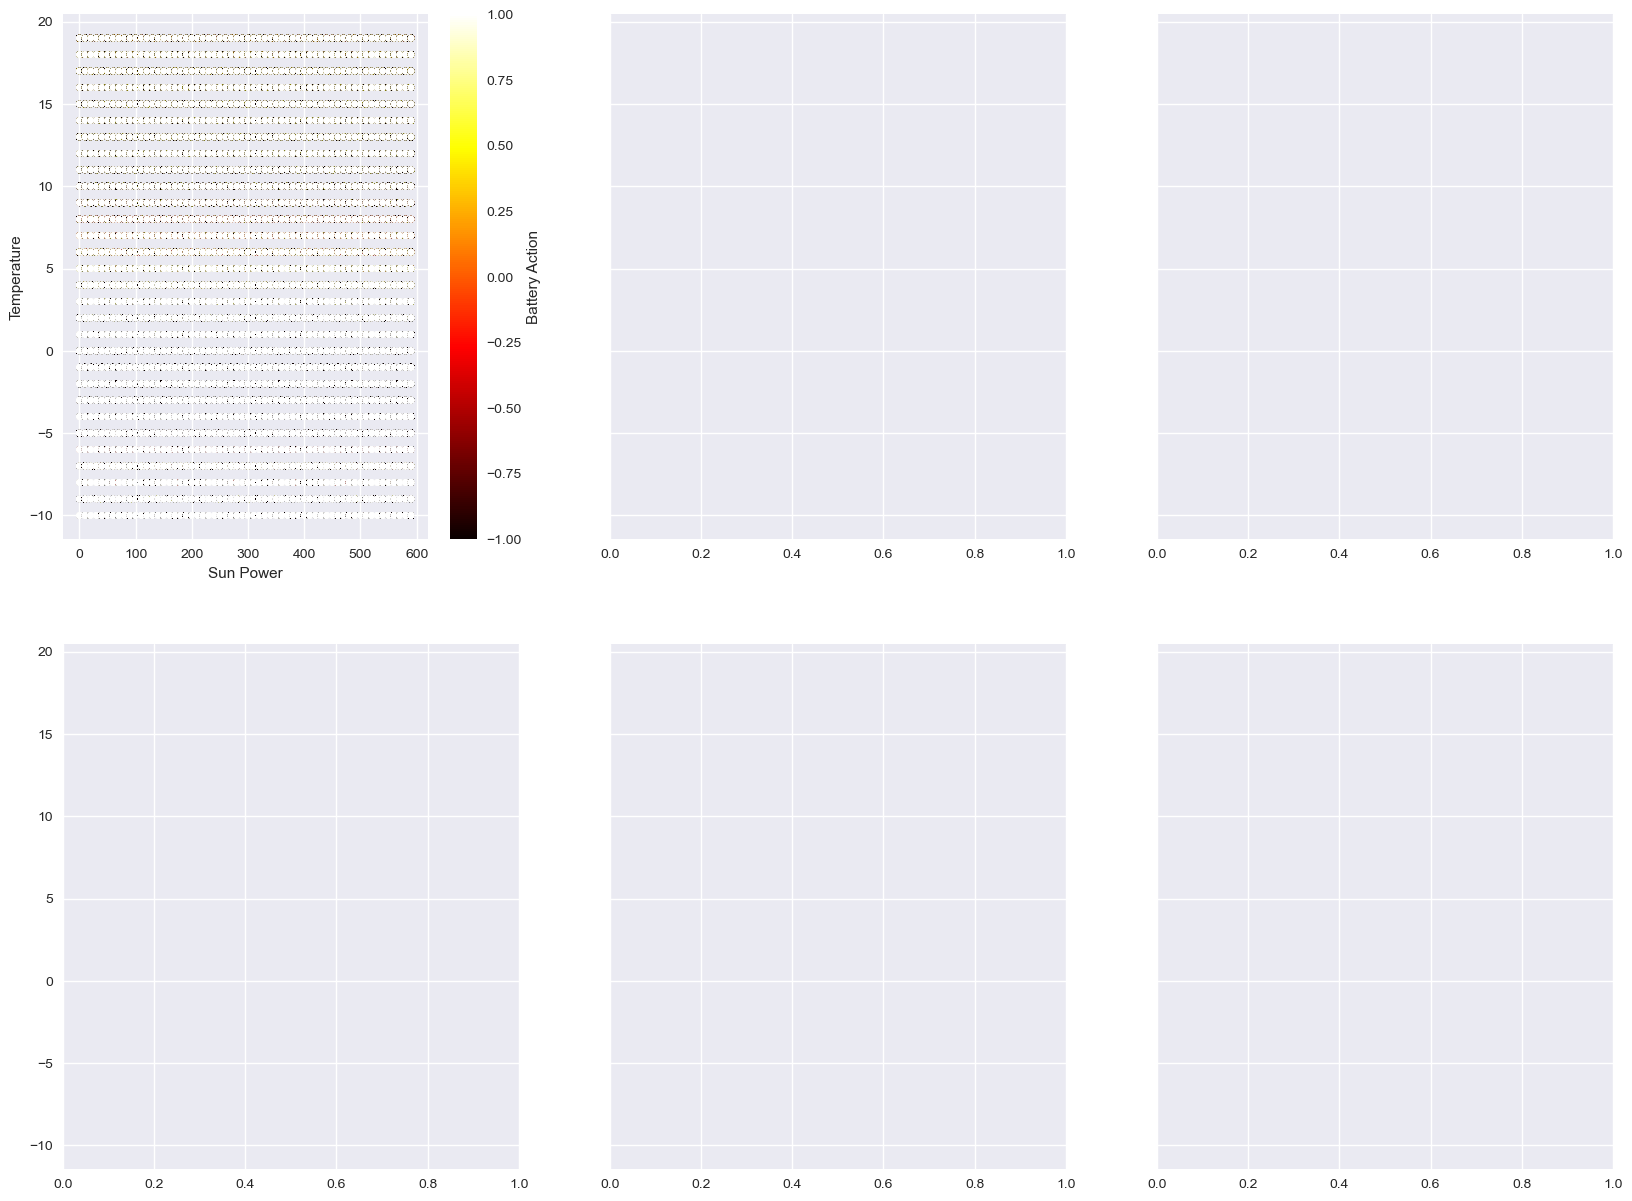

In [22]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)



policy_data.plot.scatter(x='Sun Power', y = 'Temperature', c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][0], vmin=-1, vmax=1)


'''    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]
'''

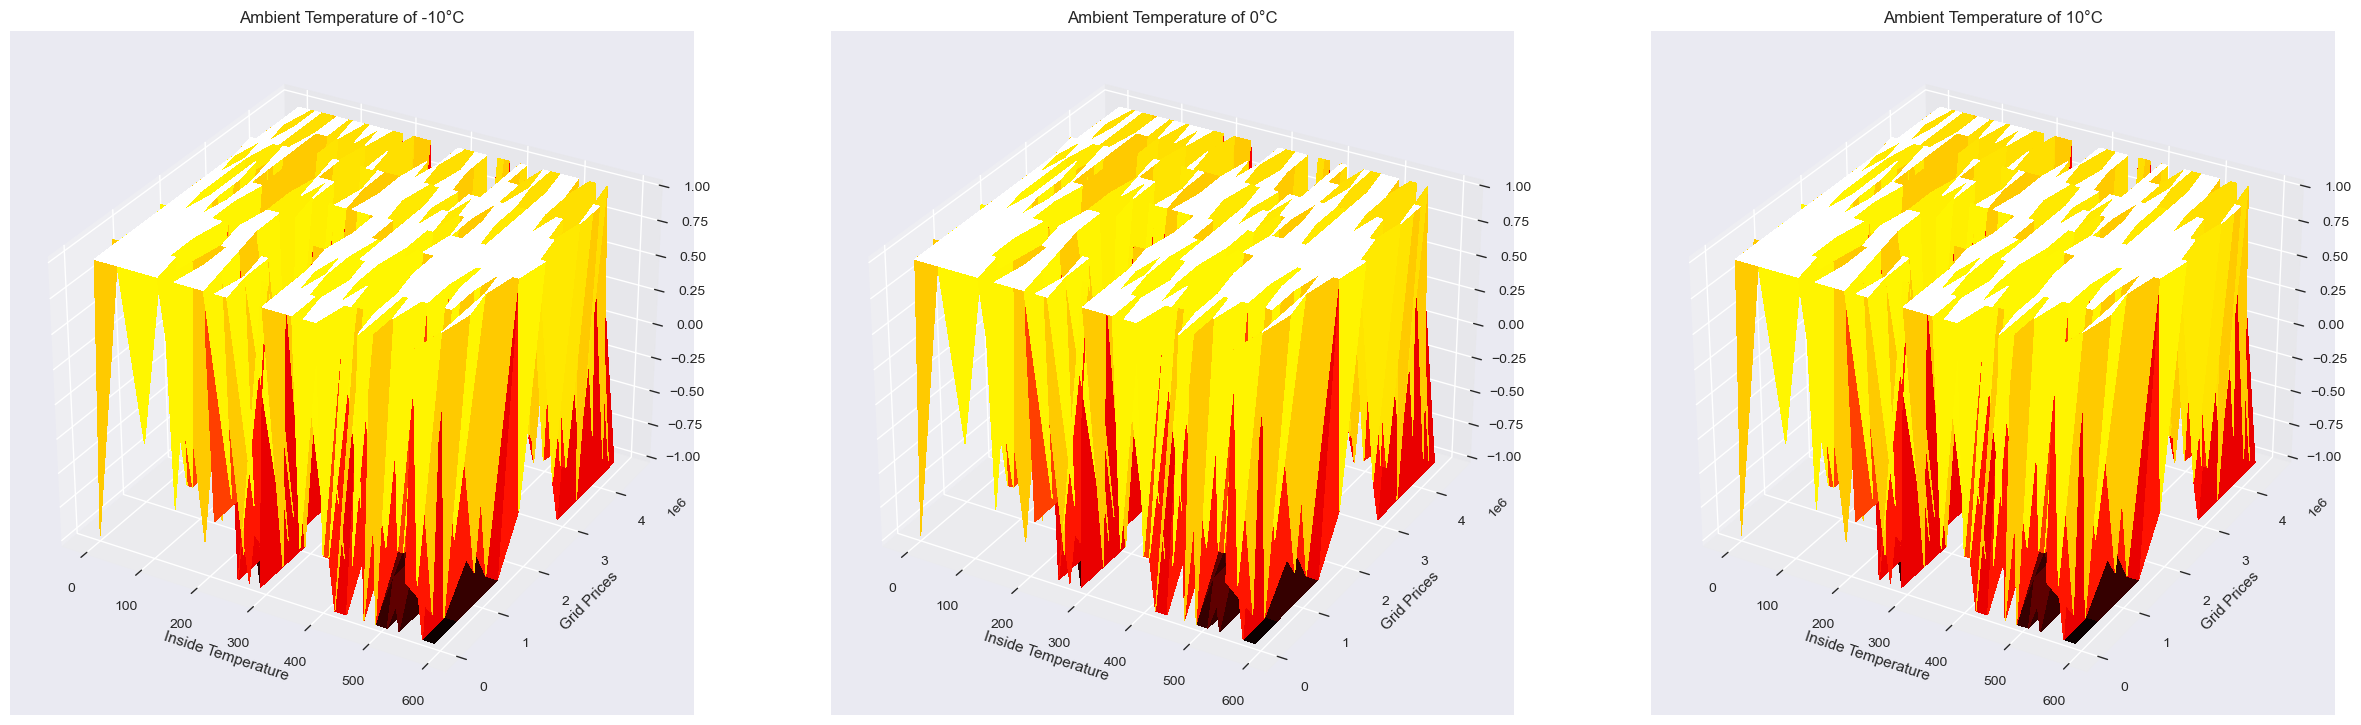

In [23]:
import numpy as np
fig = plt.figure(figsize=(30,20))

selected_temperatures = [-10, 0, 10]

for i in range(3):
    selected = policy_data[(np.round(policy_data['Temperature'],1) == selected_temperatures[i])]
    X = policy_data['Sun Power']
    Y = policy_data['Battery Level']
    Z = policy_data['Battery Action']
    ax = fig.add_subplot(2, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Ambient Temperature of {}°C'.format(selected_temperatures[i]))
    ax.set_xlabel('Inside Temperature')
    ax.set_ylabel('Grid Prices')
    #ax.set_zlabel('Actions')
    #ax.set_zlim(0, 1)
    #ax.zaxis._axinfo['label']['space_factor'] = 50

KeyError: 'Time'

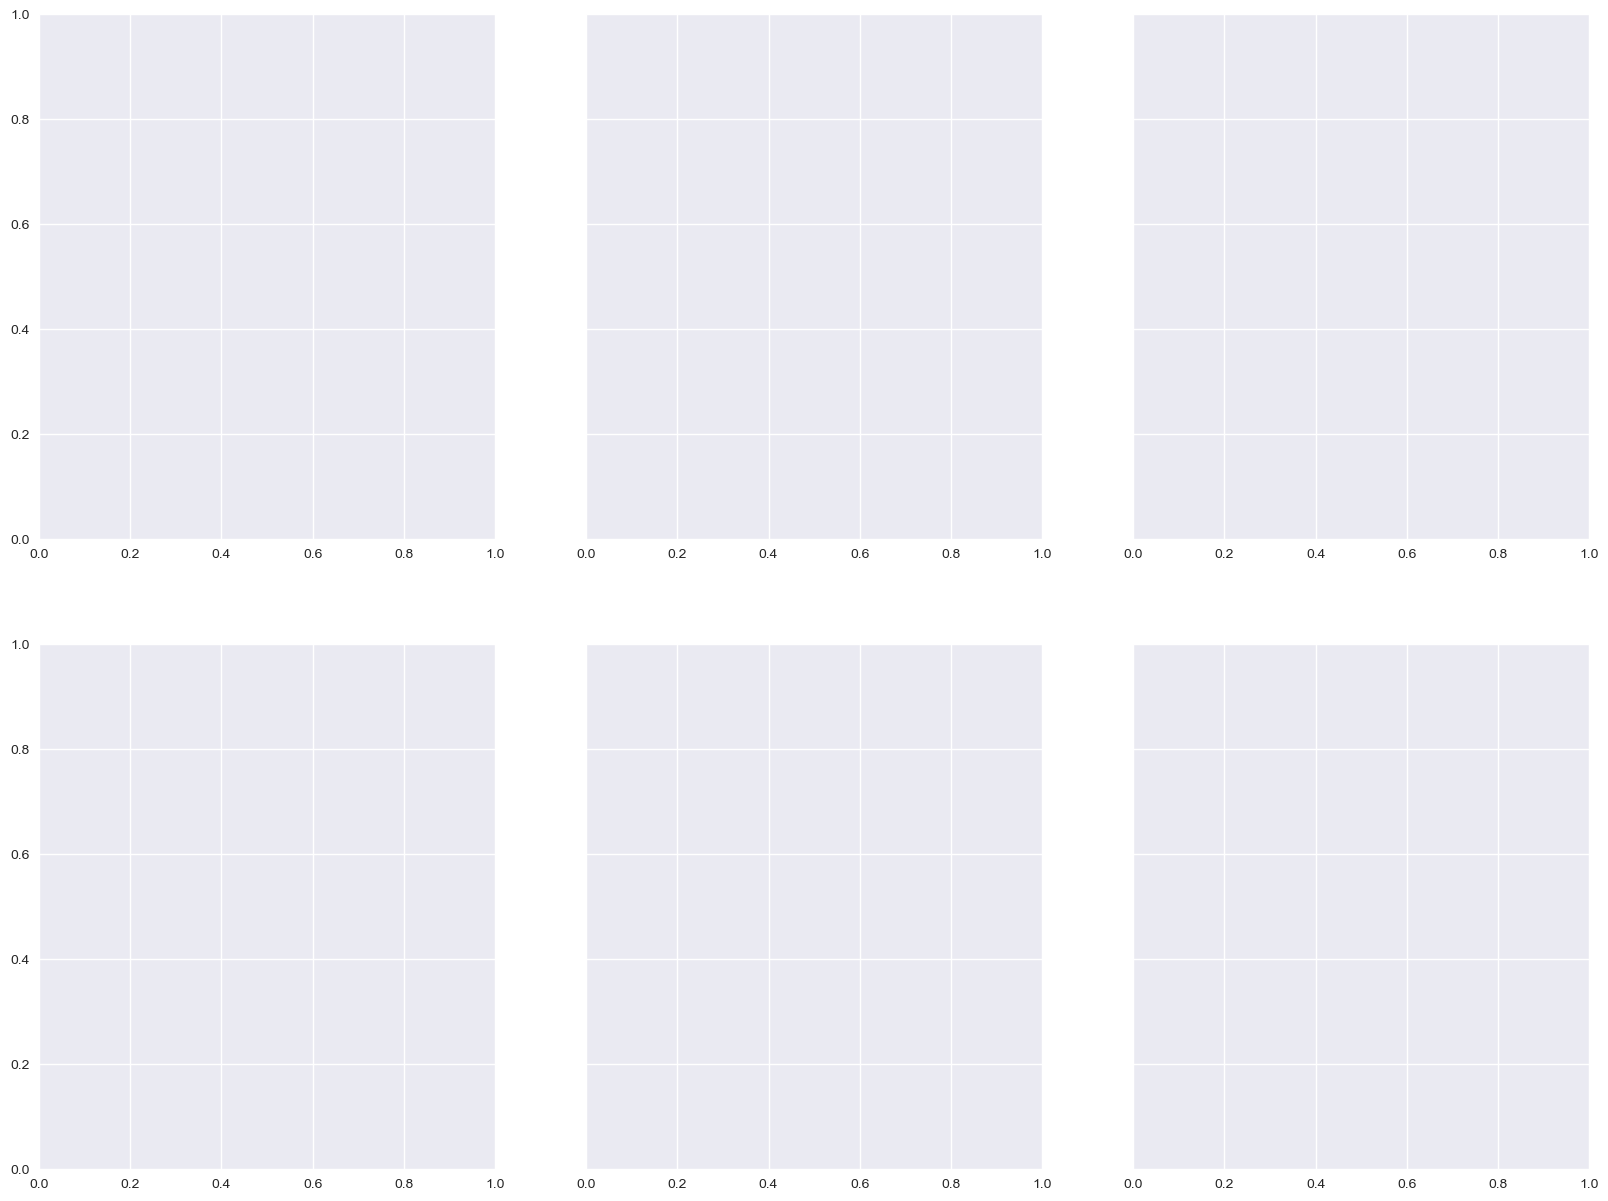

In [24]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Time {} '.format(selected_times[i]))
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == 100) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == selected_storage[i])]
#    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[2][i], vmin=-1, vmax=1)
#    axs[2][i].set_title('Battery level of {} Wh'.format(selected_storage[i]))
#fig.colorbar(ims[0], ax=axs)
#plt.savefig('data/output/DDPG_storage/DDPG_storage_policy_eval3D.png',bbox_inches='tight')

In [ ]:
style.use('seaborn')
import numpy as np
fig, axs = plt.subplots(2,3,figsize=(20,15), sharey=True)

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Sun Power', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    axs[0][i].set_title('Time {} '.format(selected_times[i]))
    
selected_temperatures = [19, 20, 21]

for i in range(3):
    selected = policy_data[(policy_data['Sun Power'] == 500) & (np.round(policy_data['Inside Temperatures'],1) == selected_temperatures[i]) & (np.round(policy_data['Ambient Temperatures'],1) == -4) & (np.round(policy_data['Battery Level'],1) == 1000)]
    selected.plot.scatter(x='Time', y = 'Prices',c='Battery Action', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
    axs[1][i].set_title('Inside Temperature of {}°C'.format(selected_temperatures[i]))

selected_storage = [1000, 2000, 4000]

In [ ]:
policy_data

In [ ]:
import numpy as np
fig = plt.figure(figsize=(28,12))
#import seaborn as sns
#sns.set('talk', palette='bright')

selected_times = [1,10,12]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Sun Power'],1) == 0)]
    X = selected['Battery Level']
    Y = selected['Prices']
    Z = selected['Battery Action']
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=-1, vmax=1)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Time of Day = {} '.format(selected_times[i]), fontsize=30, pad = 20)

    ax.set_ylabel('Prices (€/MWh)', labelpad=20, fontsize=22)
    ax.set_xlabel('Energy (Wh)', labelpad=20, fontsize=22)
    #ax.set_zlabel('Action', labelpad=30, fontsize=23)
    #ax.zaxis.set_tick_params(pad = 20)

    #ax.tick_params(length=30, width = 30, pad = 10)
    #ax.tick_params(axis='z', which='major', pad=20)
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='z', nbins=6)
    ax.tick_params(axis='z', which='major', pad=20, labelsize=20)
    ax.tick_params(axis='x', which='major', labelsize=20)
    ax.tick_params(axis='y', which='major', labelsize=20)

    ax.set_zlim(-1, 1)

    
plt.subplots_adjust(wspace=0.1)
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG/images/DDPG_storage_policy_eval3D_presentation.png',bbox_inches='tight')

In [ ]:
fig, axs = plt.subplots(1,figsize=(15,7))
selected_times = [1,10,12]

for time in selected_times:
    selected = policy_data[(policy_data['Time'] == time) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Sun Power'],1) == 0) & (np.round(policy_data['Prices'],1) == 30)]
    axs.plot(selected['Battery Level'], selected['Battery Action'])
axs.legend(['TOD of {}'.format(selected_times[i]) for i in range(len(selected_times))])
axs.set_xlabel('Energy Level (Wh)')
axs.set_ylabel('Action')
plt.savefig('data/output/DDPG/images/DDPG_storage_policy_presentation.png',bbox_inches='tight')

In [ ]:
import numpy as np
fig = plt.figure(figsize=(28,12))
#import seaborn as sns
#sns.set('talk', palette='bright')

selected_times = [10, 12,14]

for i in range(3):
    selected = policy_data[(policy_data['Time'] == selected_times[i]) & (policy_data['Inside Temperatures'] == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Battery Level'],1) == 1000)]
    Y = selected['Sun Power']
    X = selected['Prices']
    Z = selected['Battery Action']
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
                       linewidth=0, antialiased=False, vmin=-1, vmax=1)
    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
    ax.set_title('Time of Day = {} '.format(selected_times[i]), fontsize=25, pad = 20)

    ax.set_ylabel('Radiation ($W/m^2$)', labelpad=20, fontsize=20)
    ax.set_xlabel('Prices (€/MWh)', labelpad=20, fontsize=19)
    #ax.set_zlabel('Action', labelpad=30, fontsize=23)
    #ax.zaxis.set_tick_params(pad = 20)

    ax.tick_params(length=30, width = 30, pad = 10)
    ax.tick_params(axis='z', which='major', pad=20)
    plt.locator_params(axis='x', nbins=6)
    plt.locator_params(axis='y', nbins=6)
    plt.locator_params(axis='z', nbins=6)

    ax.set_zlim(-1, 1)

    
#selected_sun = [0, 100, 150]

#for i in range(3):
#    selected = policy_data[(policy_data['Sun Power'] == selected_sun[i]) & (np.round(policy_data['Inside Temperatures'],1) == 20) & (np.round(policy_data['Ambient Temperatures'],1) == 0) & (np.round(policy_data['Prices'],0) == 40)]
#    #selected.plot.scatter(x='Time', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[1][i], vmin=-1, vmax=1)
#    X = selected['Time']
#    Y = selected['Battery Level']
#    Z = selected['Battery Action']
#    ax = fig.add_subplot(2, 3, i+4, projection='3d')
#
#    ax.plot_trisurf(X, Y, Z, cmap=cm.hot,
#                       linewidth=0, antialiased=False)
#    #selected.plot.scatter(x='Sun Power', y = 'Prices',c='Actions', colormap='hot', colorbar='False', ax = axs[0][i], vmin=-1, vmax=1)
#    ax.set_title('Sun power of {} W/m2'.format(selected_sun[i]))
#    #ax.zaxis._axinfo['label']['space_factor'] = 2.8
#    ax.xaxis._axinfo['label']['space_factor'] = 2.8
#    ax.yaxis._axinfo['label']['space_factor'] = 2.8
#    ax.set_xlabel('Tau')
#    ax.set_ylabel('Battery Level')
#    #ax.set_zlabel('Actions')
#    ax.set_zlim(-1, 1)

    
plt.subplots_adjust(wspace=0.1)
    
#fig.colorbar(ims[0], ax=axs)
plt.savefig('data/output/DDPG/images/DDPG_storage_sun_policy_eval3D.png',bbox_inches='tight')

In [ ]:

fig = plt.figure(figsize=(20,15))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)